<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200"/>
</p></center>

<center><font size=10>AI Agents for Business Applications</center></font>
<center><font size=6>Week 1 - Introduction to AI Agents</center></font>

<center><p float="center">
  <img src="https://images.pexels.com/photos/2653362/pexels-photo-2653362.jpeg" width="640"/>
</p></center>

<center><font size=6>CodeGen Analyst Agent</center></font>

## **Problem Statement**

### Business Context

The used-car resale industry is becoming increasingly data-driven, with organizations handling large volumes of historical vehicle market data to support pricing, inventory, and market analysis decisions. The need for quick access to reliable insights from this data is critical for responding to market changes, optimizing inventory, and maintaining competitive pricing in a fast-paced environment.

Data teams often face challenges in efficiently extracting insights from complex datasets that include multiple vehicle attributes such as model, year, mileage, fuel type, and transmission. Translating business questions into accurate data analysis code can be time-consuming, particularly when similar exploratory analyses are performed repeatedly. This challenge is amplified by growing expectations for faster turnaround times and consistent analytical outputs.

To address these challenges, organizations can focus on adopting solutions that simplify data interaction and accelerate insight generation. Enabling natural language driven analysis allows data analyst teams to access data more intuitively, reduces manual effort, and supports timely, data-backed decision-making across business teams.

### Objective

The objective is to simplify and streamline the day-to-day work of data analysts by enabling natural language interaction with used-car market data. Common analytical requests can be translated into executable data analysis code, reducing the time spent on writing, debugging, and repeating similar logic. This allows data analysts to focus more on analysis and validation rather than manual coding.

- Reduce time spent on repetitive data analysis tasks

- Improve consistency and reliability of analysis code

- Support faster turnaround for routine analytical requests

### Data Description

The dataset consists of several key attributes describing vehicle listings:

* **ID**: Unique identifier assigned to each vehicle listing.
* **Region**: Categorical variable representing the broader geographic region where the vehicle is listed.
* **Price**: Numerical value indicating the listed price of the vehicle.
* **Year**: Numerical value representing the model year of the vehicle.
* **Manufacturer**: Categorical variable identifying the vehicle’s manufacturer.
* **Model**: Categorical variable specifying the model name of the vehicle.
* **Cylinders**: Categorical variable describing the engine cylinder configuration (for example, 4 cylinders, 6 cylinders).
* **Fuel**: Categorical variable indicating the type of fuel used by the vehicle (such as gas, diesel, electric, or hybrid).
* **Odometer**: Numerical value representing the total distance the vehicle has been driven.
* **Title Status**: Categorical variable indicating the legal title condition of the vehicle (for example, clean, salvage, rebuilt).
* **Transmission**: Categorical variable specifying the type of transmission (automatic or manual).
* **Drive**: Categorical variable describing the drivetrain configuration (for example, front-wheel drive, rear-wheel drive, all-wheel drive).
* **Type**: Categorical variable indicating the vehicle body type (such as sedan, SUV, truck, or coupe).
* **Paint Color**: Categorical variable representing the exterior color of the vehicle.
* **Description**: Textual field containing the seller-provided description of the vehicle.
* **State**: Categorical variable identifying the state in which the vehicle is listed.
* **Latitude**: Numerical value representing the latitude of the listing location.
* **Longitude**: Numerical value representing the longitude of the listing location.
* **Posting Date**: Date field indicating when the vehicle listing was posted.

This dataset captures a wide variety of vehicle characteristics, pricing information, and geographic details, enabling comprehensive analysis of used car markets and supporting tasks such as price prediction, demand analysis, and regional trend identification.


## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
!pip install -q langgraph==1.0.3 \
                langchain==1.1.0 \
                langchain-core==1.1.0 \
                langchain-openai==1.1.0 \
                langchain-community==0.4.1 \
                grandalf==0.8 \
                pandas==2.2.2 \
                numpy==2.0.2 \
                langchain-experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source 

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
from typing import TypedDict, List, Any ,Dict
import pandas as pd
import json
import re
import os


from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_experimental.utilities import PythonREPL
from langgraph.graph import StateGraph, END

import warnings
warnings.filterwarnings('ignore')

## **Data Loading and Model Initialization**


### OpenAI API Calling



In [ ]:
# Load the JSON file and extract values
file_name = 'config.json'                                                       # Name of the configuration file
with open(file_name, 'r') as file:                                              # Open the config file in read mode
    config = json.load(file)                                                    # Load the JSON content as a dictionary
    OPENAI_API_KEY = config.get("OPENAI_API_KEY")                                             # Extract the API key from the config
    OPENAI_API_BASE = config.get("OPENAI_API_BASE")                             # Extract the OpenAI base URL from the config

# Store API credentials in environment variables
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY                                  # Set API key as environment variable
os.environ["OPENAI_BASE_URL"] = OPENAI_API_BASE                                 # Set API base URL as environment variable

For the problem at hands, we will use two LLMs to separate responsibilities
- a lightweight model for primary reasoning and generation, and
- a more complex model for evaluation and validation, ensuring better accuracy, reliability, and cost efficiency.


In [ ]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)
evaluator_llm = ChatOpenAI(model='gpt-4o', temperature=0)

### Data Loading

Define data path

In [ ]:
data_path = 'used_car_dataset.csv'

**Load CSV into DataFrame**

This line of code loads the CSV file into the notebook:

* `pd.read_csv(data_path)` reads the CSV file located at the path stored in `data_path`.
* The data is loaded into a **pandas DataFrame**, which allows us to easily explore, clean, and analyze the dataset.
* The resulting DataFrame is stored in the variable `df` for further analysis.


In [ ]:
df=pd.read_csv(data_path)

**Preview first rows**

Displays the first few rows of the DataFrame to quickly inspect the structure and sample values of the dataset.


In [ ]:
df.head()

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,7316853962,fresno / madera,19999,2012,chevrolet,silverado 1500,8 cylinders,gas,141020,clean,automatic,4wd,truck,black,2012 Chevrolet Silverado 1500 LT Pickup 4D 6 1...,ca,36.790784,-119.789897,04-05-2021
1,7316834478,fresno / madera,19999,2010,chevrolet,silverado 1500,8 cylinders,gas,140616,clean,automatic,rwd,truck,silver,2010 Chevrolet Silverado 1500 LTZ Pickup 4D 5 ...,ca,36.774617,-119.791164,04-05-2021
2,7316774813,fresno / madera,23995,2013,ford,f-150,8 cylinders,gas,98607,clean,automatic,4wd,pickup,white,"Economy Auto Sales 3049 Atchison St, Riverbank...",ca,37.738239,-120.939159,04-05-2021
3,7316749411,fresno / madera,10700,2011,honda,civic,4 cylinders,gas,171457,clean,automatic,fwd,coupe,silver,"2011 Honda Civic EX Coupe! Silver, automatic, ...",ca,36.769967,-119.700165,04-05-2021
4,7316585031,fresno / madera,19000,2008,jeep,wrangler,6 cylinders,gas,146000,clean,automatic,4wd,SUV,black,Jeep Sahara Wrangler 2008. 146k miles 4X4. Ver...,ca,36.641000,-119.905000,03-05-2021


Let's define the schema of the CSV file


In [ ]:
df_schema="""
id: unique listing identifier,
region: geographic listing region,
price: listed vehicle price,
year: model year of the vehicle,
manufacturer: vehicle manufacturer,
model: vehicle model name,
cylinders: engine cylinder configuration,
fuel: fuel type,
odometer: vehicle mileage,
title_status: legal title status,
transmission: transmission type,
drive: drivetrain type,
type: vehicle body type,
paint_color: exterior color,
description: free-text listing description,
state: state where vehicle is listed,
lat: latitude of listing location,
long: longitude of listing location,
posting_date: date when the listing was posted in dd-mm-yyyy
"""

## **Data Analysis Code Generation: LLM-only Implementation**

In [ ]:
def code_generation(data_path,df_schema,question):
  '''
  Generates Python analysis code from a user question and dataset schema using an LLM.

  Parameters:
  - data_path (str): Path to the CSV file.
  - df (pandas.DataFrame): Dataset used to infer column names.
  - question (str): Analytical question to answer.

  Returns:
  - str: LLM-generated Python code only.
  '''

  code_generation_prompt = f"""
  ###ROLE
  You are a data analyst with 10+ years of experience in the retail car business.

  ###OBJECTIVE
  Based on the user question and the data schema provided, you need to write the Python code to perform the relevant analysis to answer the question.

  ###INPUT
  CSV file name: {data_path}
  CSV schema: {df_schema}
  Question: {question}

  ###OUTPUT
  The output should ONLY be the Python code.
  No other explanation or reasoning is required.
  """

  response_from_llm = llm.invoke(code_generation_prompt)

  return response_from_llm.content

In [ ]:
def code_evaluation(question,code,df_schema):

  '''
  Evaluates whether generated Python code correctly answers a given analytical question.

  The function prompts an LLM to strictly assess the code against the question
  and the provided dataframe schema, ensuring correctness, completeness, and schema compliance.

  Parameters:
  - question (str): The analytical question being evaluated.
  - code (str): Generated Python code to review.
  - df_columns (list): List of valid dataframe column names (single source of truth).

  Returns:
  - str: JSON-formatted evaluation containing a numeric rating (1–10) and a concise rationale.
  '''

  evaluation_prompt = f"""
  ### ROLE
  You're an expert Python code tester.

  ### OBJECTIVE
  Given a question, the associated data schema to use for answering it, and the Python code to answer the question, you are required to evaluate the accuracy and completeness of the code.

  ### INPUT
  Question: {question}
  Schema: {df_schema}
  Code: {code}

  ### SCORING SCHEME
  10: Fully correct
  7–9: Minor gaps owing to missed filtering or aggregation or incorrect variable names
  4–6: Incomplete code owing to missing key logic(s)
  1–3: Incorrect code owing to schema violations and/or syntactical errors

  ### OUTPUT
  The output should ONLY be a dictionary with the following keys:

  {{
      "score": "between_1_and_10",
      "rationale": "One concise sentence summarizing the rationale for the score"
  }}
  Do NOT fix, rewrite, execute, or explain the code.
  """

  response_from_llm = evaluator_llm.invoke(evaluation_prompt)

  return response_from_llm.content

## **Test Cases: LLM-only Implementation**

To evaluate how well a single-prompt LLM approach handles increasingly complex analytical questions, we test it across three levels of rigor:

- **Rigour Level 1:** How does the average listing price vary across different manufacturers for vehicles manufactured after 2015?
- **Rigour Level 2:** Which regions have the highest average listing prices for vehicles with a clean title status?
- **Rigour Level 3:** Using only vehicles with model year 2017, compute for each state:
  - the average price of automatic-transmission vehicles
  - the overall average price of all vehicles in that state
  
  Calculate the percentage deviation of automatic vehicles from the state average and return the single state with the maximum absolute deviation, along with the deviation value.

As we move toward higher rigor, the lack of structure and validation becomes more apparent.


### Rigour Level 1: How does the average listing price vary across different manufacturers for vehicles manufactured after 2015?



In [ ]:
question_1="""How does the average listing price vary across different manufacturers for vehicles manufactured after 2015?"""

In [ ]:
code_1=code_generation(data_path,df_schema,question_1)
evaluation_1=code_evaluation(question_1,code_1,df_schema)

Here’s the code that was generated.

In [ ]:
print(code_1)

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('used_car_dataset.csv')

# Filter for vehicles manufactured after 2015
filtered_df = df[df['year'] > 2015]

# Calculate the average listing price by manufacturer
average_price_by_manufacturer = filtered_df.groupby('manufacturer')['price'].mean().reset_index()

# Sort the results by average price
average_price_by_manufacturer = average_price_by_manufacturer.sort_values(by='price', ascending=False)

# Display the result
print(average_price_by_manufacturer)
```


Check the **score** assigned to the code and the corresponding **rationale**.

In [ ]:
def extract_json(llm_output):
  json_text = re.search(r"\{.*\}", llm_output, re.DOTALL).group()
  result = json.loads(json_text)
  return result

In [ ]:
llm_result_1 = extract_json(evaluation_1)

print(f"The score of the code is {llm_result_1['score']}")
print("\n")
print(f"The rationale for the score provided is: {llm_result_1['rationale']}")


The score of the code is 10


The rationale for the score provided is: The code correctly filters vehicles manufactured after 2015, calculates the average price by manufacturer, and sorts the results, fully addressing the question.


Let's execute the code provided by the LLM and check if we get the desired results.

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/used_car_dataset.csv')

# Filter for vehicles manufactured after 2015
filtered_df = df[df['year'] > 2015]

# Calculate the average listing price by manufacturer
average_price_by_manufacturer = filtered_df.groupby('manufacturer')['price'].mean().reset_index()

# Sort the results by average price
average_price_by_manufacturer = average_price_by_manufacturer.sort_values(by='price', ascending=False)

# Display the result
print(average_price_by_manufacturer)

  manufacturer         price
1         ford  28164.961832
0    chevrolet  27843.965116
3         jeep  25139.098039
5          ram  23675.690909
6       toyota  18449.731092
2        honda  15859.880435
4       nissan  11406.462687


**Observation:**

The LLM correctly generated code to filter vehicles manufactured after 2015 and compute manufacturer-wise average listing prices for this straightforward aggregation task.



### Rigour Level 2: Which regions have the highest average listing prices for vehicles with a clean title status?

In [ ]:
question_2="Which regions have the highest average listing prices for vehicles with a clean title status?"

In [ ]:
code_2=code_generation(data_path,df_schema,question_2)
evaluation_2=code_evaluation(question_2,code_2,df_schema)

Here’s the code that was generated.

In [ ]:
print(code_2)

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('used_car_dataset.csv')

# Filter for vehicles with a clean title status
clean_title_df = df[df['title_status'] == 'clean']

# Calculate the average listing price by region
average_price_by_region = clean_title_df.groupby('region')['price'].mean().reset_index()

# Sort the results by average price in descending order
average_price_by_region = average_price_by_region.sort_values(by='price', ascending=False)

# Display the result
print(average_price_by_region)
```


Check the **score** assigned to the code and the corresponding **rationale**.

In [ ]:
llm_result_2 = extract_json(evaluation_2)

print(f"The score of the code is {llm_result_2['score']}")
print("\n")
print(f"The rationale for the score provided is: {llm_result_2['rationale']}")


The score of the code is 10


The rationale for the score provided is: The code correctly filters for clean title vehicles, calculates the average price by region, and sorts the results in descending order.


Let's execute the code provided by the LLM and check if we get the desired results.

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/used_car_dataset.csv')

# Filter for clean title status
clean_title_data = data[data['title_status'] == 'clean']

# Calculate the average listing price by region
average_price_by_region = clean_title_data.groupby('region')['price'].mean().reset_index()

# Sort the results by average price in descending order
highest_average_price_regions = average_price_by_region.sort_values(by='price', ascending=False)

# Display the result
print(highest_average_price_regions)

                     region         price
0                      bend  20565.021538
9   spokane / coeur d'alene  20557.301724
6             new hampshire  18718.047273
7    omaha / council bluffs  18680.107438
3           fresno / madera  17932.576744
1                  columbus  16788.815217
8                   orlando  16557.158730
5  kennewick-pasco-richland  14869.020833
2                    eugene  14056.226316
4              jacksonville  13959.894977


**Observation:**

The LLM received a high score as the generated code correctly filtered clean-title vehicles, aggregated prices by region, and sorted results to identify regions with the highest average listing prices.


### Rigour Level 3: Using only vehicles with model year 2017, compute for each state:
  - the average price of automatic-transmission vehicles
  - the overall average price of all vehicles in that state
  
  Calculate the percentage deviation of automatic vehicles from the state average and return the single state with the maximum absolute deviation, along with the deviation value.
  

In [ ]:
question_3="""Using only vehicles with model year 2017, compute for each state:
  - the average price of automatic-transmission vehicles
  - the overall average price of all vehicles in that state

  Calculate the percentage deviation of automatic vehicles from the state average and return the single state with the maximum absolute deviation, along with the deviation value."""

In [ ]:
code_3=code_generation(data_path,df_schema,question_3)
evaluation_3=code_evaluation(question_3,code_3,df_schema)

Here’s the code that was generated.

In [ ]:
print(code_3)

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('used_car_dataset.csv')

# Filter for vehicles with model year 2017
df_2017 = df[df['year'] == 2017]

# Calculate average price of automatic vehicles and overall average price by state
state_avg = df_2017.groupby('state')['price'].mean().reset_index(name='overall_avg_price')
auto_avg = df_2017[df_2017['transmission'] == 'automatic'].groupby('state')['price'].mean().reset_index(name='auto_avg_price')

# Merge the two averages
merged_avg = pd.merge(state_avg, auto_avg, on='state', how='left')

# Calculate percentage deviation
merged_avg['deviation'] = ((merged_avg['auto_avg_price'] - merged_avg['overall_avg_price']) / merged_avg['overall_avg_price']) * 100

# Find the state with the maximum absolute deviation
max_deviation_state = merged_avg.loc[merged_avg['deviation'].abs().idxmax()]

# Output the result
result = (max_deviation_state['state'], max_deviation_state['deviation'])
print(result)
```


Check the **score** assigned to the code and the corresponding **rationale**.

In [ ]:
llm_result_3 = extract_json(evaluation_3)

print(f"The score of the code is {llm_result_3['score']}")
print("\n")
print(f"The rationale for the score provided is: {llm_result_3['rationale']}")


The score of the code is 10


The rationale for the score provided is: The code correctly filters, calculates averages, computes deviations, and identifies the state with the maximum deviation as per the given requirements.


Let's execute the code provided by the LLM and check if we get the desired results.

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/used_car_dataset.csv')

# Filter for model year 2017
df_2017 = df[df['year'] == 2017]

# Calculate average price of automatic vehicles and overall average price by state
state_avg = df_2017.groupby('state')['price'].mean().reset_index(name='overall_avg_price')
auto_avg = df_2017[df_2017['transmission'] == 'automatic'].groupby('state')['price'].mean().reset_index(name='auto_avg_price')

# Merge the two averages
merged_avg = pd.merge(state_avg, auto_avg, on='state', how='left')

# Calculate percentage deviation
merged_avg['deviation'] = (merged_avg['auto_avg_price'] - merged_avg['overall_avg_price']) / merged_avg['overall_avg_price'] * 100

# Find the state with the maximum absolute deviation
max_deviation_state = merged_avg.loc[merged_avg['deviation'].abs().idxmax()]

# Output the result
result = (max_deviation_state['state'], max_deviation_state['deviation'])
print(result)

('wa', np.float64(-2.716793753401363))


**Observation:**

The LLM received a high evaluation score as the generated code correctly restricted data to model year 2017, computed both automatic-only and overall state-wise average prices, calculated percentage deviation, and accurately identified the state with the maximum absolute deviation.


### Observations: LLM Code Generation

* The **LLM is able to answer analytical questions correctly** and generate working code across tasks.

* However, it can **hallucinate**, offers **no explicit control over its reasoning**, and **cannot automatically recover or regenerate outputs** when failures occur.

* At an **organizational scale**, this lack of control makes standalone LLM-based systems **difficult to govern, audit, and extend reliably**.

* Capabilities such as **code execution, result inspection, observation collection, and iterative correction** must be added externally, as they are **not natively supported by the LLM**.


## **Data Analysis Code Generation: Agentic AI Implementation**

To address these limitations, we move from direct prompt-based code generation to an **agentic, node-based workflow.**

Instead of asking the LLM to immediately produce code, we decompose the task into multiple well-defined steps:

- Planner Node : Interpret the question, resolve ambiguity, select relevant columns, and define all required calculations explicitly.

- Validation Node: Check the plan for schema adherence, logical completeness, and alignment with the question.

- Replanner Node : Refine or fix the plan if gaps, inconsistencies, or missing steps are detected.

- Code Generation Node: Convert the validated plan into deterministic, executable code and generate the final output.

- Code Evaluation Node: Assess the generated code against the original question and schema to ensure correctness, completeness, and logical fidelity.

Each step is handled by a dedicated node, making the system more **robust, explainable, and reliable**.


### Define Agent State

All nodes in the workflow communicate through a shared state object.  
This ensures that:

- Information flows **consistently** across nodes
- Intermediate outputs (plans, decisions, code) are **explicitly stored**
- The system remains **traceable and debuggable**

This design is critical for building reliable multi-step analytical pipelines.


In [ ]:
class AgentState(TypedDict):
    question: str
    csv_schema: str
    csv_paths: dict
    plan: str
    user_approved: bool
    code: str
    reasoning: str
    replan_count: int
    evaluation: str

### Define Agent Nodes

Rather than relying on a single monolithic LLM call, we break the analysis into specialized nodes, each responsible for a specific role.

This separation of concerns:
- Improves reasoning quality
- Enables validation and correction
- Reduces hallucinations
- Increases trust in the final output


#### Planning Node

Define the Planning Agent to reason about the analytical steps

In [ ]:
def planner(state: AgentState):

    '''
    Generates a step-by-step analytical plan to answer a user question using a given CSV schema.

    The function prompts an LLM to decompose the user’s question into clear, computation-ready
    analytical steps while strictly adhering to the provided schema as the single source of truth.

    Parameters:
    - state (AgentState): Dictionary-like object containing the user question and CSV schema.

    Returns:
    - dict: A dictionary with a single key, 'plan', containing the generated analytical plan.
    '''

    planning_prompt = f"""

### ROLE
You are a senior data analyst with 10+ years of experience in the retail automobile industry.
Your task is to produce a detailed, computation-ready coding plan with strict schema discipline.

### INPUT
User Question:
{state['question']}

Available CSV schema (single source of truth):
{state['csv_schema']}

### OBJECTIVE

Break the question into multiple parts based on the ask and then create a step-by-step plan for each part of the question.

Create a complete analytical plan that fully answers the question using only the provided schema, clearly defining all metrics,
calculations, and comparisons, and structuring the steps so that the next agent can directly translate the plan into Python code without any additional interpretation.


### OUTPUT FORMAT
- Provide step-by-step instructions to complete the task.
- Do not include code in the output, it should strictly be just a plan.

"""
    plan = llm.invoke(planning_prompt).content.strip()
    return {"plan": plan}


#### Plan Validator Node

Evaluate the quality and correctness of the proposed plan and approve or reject it.

In [ ]:
def plan_validator(state: AgentState):

    '''
    Validates an analysis plan against the user question and CSV schema for correctness and completeness.

    Parameters:
    - state (AgentState): Contains the question, CSV schema, and proposed plan.

    Returns:
    - dict: {'user_approved': True} if approved, else {'user_approved': False}.
    '''

    validation_prompt = f"""
### ROLE
You are a validation agent responsible for evaluating the quality and correctness of an analysis plan.

### INPUT
User Question:
{state['question']}

Available CSV schema (single source of truth):
{state['csv_schema']}

Proposed Analysis Plan:
{state['plan']}

### OBJECTIVE
Validate whether the proposed analysis plan correctly and completely answers the user question using only the provided CSV schema.

### VALIDATION CRITERIA
1. The plan correctly captures the analytical intent of the user question.
2. All steps rely strictly on the available schema without assumed, inferred, or external data.
3. The steps are logically ordered and collectively sufficient to answer the question.
4. All conditions implied by the question (filters, groupings, aggregations, comparisons, ordering) are explicitly included.
5. Each step is clear, unambiguous, and practically executable.

### OUTPUT
- The output should be ONLY one word out of APPROVED or REJECTED, depending on whether the validation criterion are satisfied or violated.
- Do not include any additional explanations, comments, or text.

Response:
"""

    decision = evaluator_llm.invoke(validation_prompt).content.strip()

    if decision == "APPROVED":
        return {"user_approved": True}
    else:
        return {"user_approved": False}


#### Replanner Node

Generate an improved plan if the original plan is rejected, retrying up to a maximum number of attempts.

In [ ]:
def replanner(state: AgentState):

    '''
    Regenerates a corrected analysis plan when a previous plan is rejected.

    Increments a replanning counter, enforces a maximum retry limit, and prompts an LLM
    to produce an improved, schema-compliant analytical plan.

    Parameters:
    - state (AgentState): Contains the question, CSV schema, rejected plan,
      and replanning metadata.

    Returns:
    - dict: Updated state with a revised 'plan' and 'user_approved' set to False.

    Raises:
    - Exception: If the maximum number of replanning attempts is exceeded.
    '''


     # Increment replan count
    old_count=state['replan_count']
    state["replan_count"] = old_count + 1

    # Check if max replans reached
    if state["replan_count"] > 3:
        raise Exception("Maximum replanning attempts reached. Unable to generate a valid plan.")

    replanner_prompt = f"""
### ROLE
You are a data analysis reasoning agent responsible for producing a corrected and improved analysis plan after a previous plan was rejected.

### INPUT
User Question:
{state['question']}

Available CSV schema (single source of truth):
{state['csv_schema']}

Previous Rejected Plan:
{state['plan']}

### OBJECTIVE
Generate a correct, complete, and logically sound analysis plan that answers the user question using only the provided CSV schema.

### INSTRUCTIONS
1. Carefully analyze the user question and the available schema.
2. Identify and correct any logical errors, omissions, or ambiguities in the previous plan.
3. Ensure every step is feasible using only the given columns; do not assume or invent data.
4. Explicitly include all required operations such as filtering, grouping, aggregation, comparison, and ordering as implied by the question.
5. Produce a clear, logically ordered, numbered list of steps in plain language.

### OUTPUT
Return ONLY the improved analysis plan as a numbered list, formatted as plain text, suitable for the next code generation step.
"""

    new_plan = llm.invoke(replanner_prompt).content.strip()
    return {"plan": new_plan, "user_approved": False}

The planning phase is intentionally isolated from code generation.

Key advantages:
- The **Planner Node** focuses purely on analytical reasoning.
- The **Validator Node** enforces schema correctness and logical completeness.
- The **Replanner Node** provides a controlled recovery mechanism when plans fail validation.

This loop ensures that only **sound and feasible plans** move forward.


#### Plan-to-Code Node

Only after a plan is approved do we convert it into executable code.

This separation ensures:
- Code strictly follows validated logic
- No hidden assumptions are introduced
- Errors are minimized at execution time


Convert the approved analytical plan into executable Python code using pandas.

In [ ]:
def plan_to_code(state: AgentState):

    '''
    Converts an approved analysis plan into executable pandas code.

    Parameters:
    - state (AgentState): Contains the user question, CSV paths, schema,
      and the validated analysis plan.

    Returns:
    - dict: A dictionary with key 'code' containing executable Python code.
    '''

    code_generation_prompt = f"""
### Role
You are a Senior Data Analyst who converts an analytical plan into accurate, error-free, executable Python code

### INPUT
User Question:
{state['question']}

CSV file paths:
{state['csv_paths']}

Available CSV schema (single source of truth):
{state['csv_schema']}

Coding analysis plan to implement:
{state['plan']}

### OBJECTIVE

Based on the user question and coding analysis plan provided, you are required to convert the plan
into accurate, error-free, executable Python code, retaining only the necessary snippets to answer the question.

### OUTPUT
Return ONLY executable Python code using pandas that correctly implements the analysis plan and print the final answer.
Do not add any text other than code
"""
    code = llm.invoke(code_generation_prompt).content
    return {"code": code}

#### Code Evaluation Node

In [ ]:
def code_evaluator(state: AgentState):


  '''
    Evaluates generated pandas code for correctness and schema compliance.

    Uses an LLM to assess whether the code fully answers the user question
    using only the provided CSV schema and returns a structured evaluation.

    Parameters:
    - state (AgentState): Contains the question, CSV schema, and generated code.

    Returns:
    - AgentState: Updated state including the evaluation rationale and rating.
  '''

  evaluation_prompt=f"""
### ROLE
You're an expert Python code tester.

### OBJECTIVE
Given a question, the associated data schema to use for answering it, and the Python code to answer the question, you are required
to evaluate the accuracy and completeness of the code.

### INPUT
Question: {state['question']}
Schema: {state['csv_schema']}
Code: {state['code']}

### SCORING SCHEME
10: Fully correct
7–9: Minor gaps owing to missed filtering or aggregation or incorrect variable names
4–6: Incomplete code owing to missing key logic(s)
1–3: Incorrect code owing to schema violations and/or syntactical errors

### OUTPUT
The output should ONLY be a JSON with the following keys:
1. "score": "between_1_and_10",
2. "rationale": "One concise sentence summarizing the rationale for the score"

Do NOT fix, rewrite, execute, or explain the code.
"""
  response_from_llm = evaluator_llm.invoke(evaluation_prompt)

  state['evaluation'] = response_from_llm.content

  return state


### Build LangGraph Workflow

Add all nodes, define entry point, set conditional edges, and compile the graph into an executable workflow.

In [ ]:
graph = StateGraph(AgentState)

# Add all nodes
graph.add_node("planner", planner)
graph.add_node("plan_validator", plan_validator)
graph.add_node("replanner", replanner)
graph.add_node("plan_to_code", plan_to_code)
graph.add_node("code_evaluator", code_evaluator)


# Set entry point
graph.set_entry_point("planner")

# Conditional routing after planner
graph.add_edge("planner", "plan_validator")

# Conditional routing after plan_validator
graph.add_conditional_edges(
    "plan_validator",
    lambda state: "approved" if state["user_approved"] else "replan",
    {
        "approved": "plan_to_code",
        "replan": "replanner"
    }
)

# After replanner, re-validate the new plan
graph.add_edge("replanner", "plan_validator")


graph.add_edge("plan_to_code", "code_evaluator")

# Compile the graph
app = graph.compile()


The final workflow forms a controlled, agentic pipeline:

1. Interpret the question
2. Plan the analysis
3. Validate the plan
4. Replan if necessary
5. Generate executable code
6. Evaluate the executable code

This structure mirrors how a human analyst approaches complex data problems.


#### Visualize Workflow


Display a visual representation of the node-based workflow using a Mermaid diagram.

In [ ]:
from IPython.display import Image, display

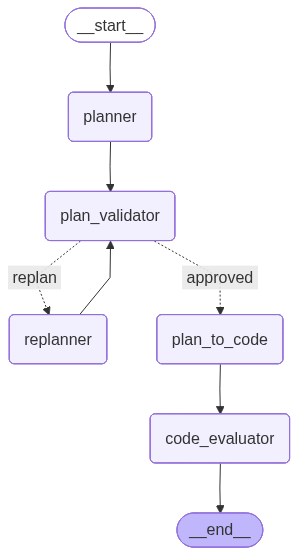

In [ ]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## **Test Cases: Agentic AI Implementation**

We now test the same three analytical queries using the **agentic system** to observe how multiple tools **plan the analysis, validate the approach, and generate the final code** in a structured and controlled manner.

### Rigour 1: How does the average listing price vary across different manufacturers for vehicles manufactured after 2015?



In [ ]:
output_1 = app.invoke({
    "question": question_1,
    "csv_schema": df_schema,
    "csv_paths": data_path,
     "replan_count" : 0,
})

First, let’s review the plan generated by the agent to build the code.

In [ ]:
print(output_1['plan'])

### Step-by-Step Analytical Plan

#### Part 1: Data Preparation
1. **Load the Data**
   - Read the CSV file containing the vehicle listings into a DataFrame.

2. **Filter the Data**
   - Filter the DataFrame to include only vehicles manufactured after 2015. This can be done by checking the `year` column.

3. **Select Relevant Columns**
   - From the filtered DataFrame, select only the following columns for further analysis:
     - `manufacturer`
     - `price`

#### Part 2: Data Aggregation
4. **Group Data by Manufacturer**
   - Group the filtered DataFrame by the `manufacturer` column to prepare for calculating average prices.

5. **Calculate Average Price**
   - For each manufacturer, calculate the average listing price. This involves:
     - Using the `price` column to compute the mean for each group of manufacturers.

6. **Create a Summary DataFrame**
   - Create a new DataFrame that contains:
     - `manufacturer`: the name of the manufacturer
     - `average_price`: the calculate

Here’s the code that was generated.

In [ ]:
print(output_1['code'])

```python
import pandas as pd

# Step 1: Load the Data
df = pd.read_csv('used_car_dataset.csv')

# Step 2: Filter the Data
filtered_df = df[df['year'] > 2015]

# Step 3: Select Relevant Columns
relevant_df = filtered_df[['manufacturer', 'price']]

# Step 4: Group Data by Manufacturer
grouped_df = relevant_df.groupby('manufacturer')

# Step 5: Calculate Average Price
average_price_df = grouped_df['price'].mean().reset_index()

# Step 6: Create a Summary DataFrame
average_price_df.columns = ['manufacturer', 'average_price']

# Step 7: Sort the Results
sorted_average_price_df = average_price_df.sort_values(by='average_price', ascending=False)

# Step 8: Prepare for Output
sorted_average_price_df['average_price'] = sorted_average_price_df['average_price'].round(2)

# Final Output
print(sorted_average_price_df)
```


Check the **score** assigned to the code and the corresponding **rationale**.

In [ ]:
agent_result_1 = output_1['evaluation']
agent_result_1 = extract_json(agent_result_1)
print(f"The score of the code is {agent_result_1['score']}")
print("\n")
print(f"The rationale for the score provided is: {agent_result_1['rationale']}")


The score of the code is 10


The rationale for the score provided is: The code correctly filters, groups, calculates, and sorts the average listing price by manufacturer for vehicles manufactured after 2015.


Let's execute the code provided by the Agent and check if we get the desired results.

In [ ]:
import pandas as pd

# Step 1: Load the Data
df = pd.read_csv('used_car_dataset.csv')

# Step 2: Filter the Data
filtered_df = df[df['year'] > 2015]

# Step 3: Select Relevant Columns
relevant_df = filtered_df[['manufacturer', 'price']]

# Step 4: Group Data by Manufacturer
grouped_df = relevant_df.groupby('manufacturer')

# Step 5: Calculate Average Price
average_price_df = grouped_df['price'].mean().reset_index()

# Step 6: Create a Summary DataFrame
average_price_df.columns = ['manufacturer', 'average_price']

# Step 7: Sort the Results
sorted_average_price_df = average_price_df.sort_values(by='average_price', ascending=False)

# Step 8: Prepare for Output
sorted_average_price_df['average_price'] = sorted_average_price_df['average_price'].round(2)

# Final Output
print(sorted_average_price_df)

  manufacturer  average_price
1         ford       28164.96
0    chevrolet       27843.97
3         jeep       25139.10
5          ram       23675.69
6       toyota       18449.73
2        honda       15859.88
4       nissan       11406.46


**Observation:**

The agents produced a clear step-by-step plan, validated the approach, and generated correct code, demonstrating structured reasoning even for a simple analytical query.


### Rigour 2: Which regions have the highest average listing prices for vehicles with a clean title status?

In [ ]:
output_2 = app.invoke({
    "question": question_2,
    "csv_schema": df_schema,
    "csv_paths": data_path,
    "replan_count" : 0,

})

First, let’s review the plan generated by the agent to build the code.

In [ ]:
print(output_2['plan'])

### Step-by-Step Analytical Plan

#### Part 1: Data Filtering
1. **Objective**: Filter the dataset to include only vehicles with a clean title status.
   - **Action**: Create a subset of the data where the `title_status` column is equal to "clean".

#### Part 2: Grouping Data
2. **Objective**: Group the filtered data by region to prepare for average price calculation.
   - **Action**: Use the `region` column to group the filtered dataset.

#### Part 3: Calculating Average Prices
3. **Objective**: Calculate the average listing price for each region.
   - **Action**: For each group (region), compute the average of the `price` column.
   - **Metric**: Average Price = Sum of Prices in Region / Count of Listings in Region

#### Part 4: Sorting Results
4. **Objective**: Identify the regions with the highest average listing prices.
   - **Action**: Sort the results of the average price calculation in descending order.
   - **Output**: Prepare a list of regions sorted by average price from hig

Here’s the code that was generated.

In [ ]:
print(output_2['code'])

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('used_car_dataset.csv')

# Part 1: Data Filtering
clean_title_df = df[df['title_status'] == 'clean']

# Part 2: Grouping Data
grouped_df = clean_title_df.groupby('region')

# Part 3: Calculating Average Prices
average_prices = grouped_df['price'].mean().reset_index()

# Part 4: Sorting Results
sorted_average_prices = average_prices.sort_values(by='price', ascending=False)

# Part 5: Selecting Top Regions
top_regions = sorted_average_prices.head(10)

# Part 6: Final Output Formatting
print(top_regions.rename(columns={'price': 'Average Listing Price'}))
```


Check the **score** assigned to the code and the corresponding **rationale**.

In [ ]:
agent_result_2 = output_2['evaluation']
agent_result_2 = extract_json(agent_result_2)
print(f"The score of the code is {agent_result_2['score']}")
print("\n")
print(f"The rationale for the score provided is: {agent_result_2['rationale']}")


The score of the code is 10


The rationale for the score provided is: The code correctly filters, groups, calculates, sorts, and formats the data to identify regions with the highest average listing prices for vehicles with a clean title status.


Let's execute the code provided by the Agent and check if we get the desired results.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('used_car_dataset.csv')

# Part 1: Data Filtering
clean_title_df = df[df['title_status'] == 'clean']

# Part 2: Grouping Data
grouped_df = clean_title_df.groupby('region')

# Part 3: Calculating Average Prices
average_prices = grouped_df['price'].mean().reset_index()

# Part 4: Sorting Results
sorted_average_prices = average_prices.sort_values(by='price', ascending=False)

# Part 5: Selecting Top Regions
top_regions = sorted_average_prices.head(10)

# Part 6: Final Output Formatting
print(top_regions.rename(columns={'price': 'Average Listing Price'}))

                     region  Average Listing Price
0                      bend           20565.021538
9   spokane / coeur d'alene           20557.301724
6             new hampshire           18718.047273
7    omaha / council bluffs           18680.107438
3           fresno / madera           17932.576744
1                  columbus           16788.815217
8                   orlando           16557.158730
5  kennewick-pasco-richland           14869.020833
2                    eugene           14056.226316
4              jacksonville           13959.894977


**Observation:**

The agentic system explicitly decomposed the problem into logical steps, validated schema alignment, and generated correct code, ensuring consistency and clarity throughout the workflow.


### Rigour 3: Using only vehicles with model year 2017, compute for each state:
  - the average price of automatic-transmission vehicles
  - the overall average price of all vehicles in that state
  
  Calculate the percentage deviation of automatic vehicles from the state average and return the single state with the maximum absolute deviation, along with the deviation value.
  

In [ ]:
output_3 = app.invoke({
    "question": question_3,
    "csv_schema": df_schema,
    "csv_paths": data_path,
    "replan_count" : 0,
})

First, let’s review the plan generated by the agent to build the code.

In [ ]:
print(output_3['plan'])

### Step-by-Step Analytical Plan

#### Part 1: Filter Data for Model Year 2017
1. **Load the CSV Data**: Read the CSV file containing the vehicle listings into a DataFrame.
2. **Filter for Model Year**: 
   - Create a new DataFrame that includes only the rows where the `year` column is equal to 2017.

#### Part 2: Separate Automatic and All Vehicles
3. **Filter for Automatic Transmission Vehicles**:
   - From the filtered DataFrame (from Part 1), create another DataFrame that includes only the rows where the `transmission` column is equal to "automatic".
4. **Group by State**:
   - Group both the automatic vehicles DataFrame and the original filtered DataFrame by the `state` column.

#### Part 3: Calculate Average Prices
5. **Calculate Average Price of Automatic Vehicles**:
   - For the grouped DataFrame of automatic vehicles, compute the average of the `price` column for each state.
   - Store the results in a new DataFrame with columns: `state` and `avg_price_automatic`.
6. **Calcula

Here’s the code that was generated.

In [ ]:
print(output_3['code'])

```python
import pandas as pd

# Step 1: Load the CSV Data
df = pd.read_csv('used_car_dataset.csv')

# Step 2: Filter for Model Year 2017
df_2017 = df[df['year'] == 2017]

# Step 3: Filter for Automatic Transmission Vehicles
df_automatic = df_2017[df_2017['transmission'] == 'automatic']

# Step 4: Group by State
grouped_automatic = df_automatic.groupby('state')['price'].mean().reset_index()
grouped_automatic.columns = ['state', 'avg_price_automatic']

grouped_all = df_2017.groupby('state')['price'].mean().reset_index()
grouped_all.columns = ['state', 'avg_price_all']

# Step 5: Merge Average Price DataFrames
merged = pd.merge(grouped_automatic, grouped_all, on='state')

# Step 6: Calculate Percentage Deviation
merged['percentage_deviation'] = ((merged['avg_price_automatic'] - merged['avg_price_all']) / merged['avg_price_all']) * 100

# Step 7: Calculate Absolute Deviation
merged['absolute_deviation'] = merged['percentage_deviation'].abs()

# Step 8: Find Maximum Absolute Deviation
max_

Check the **score** assigned to the code and the corresponding **rationale**.

In [ ]:
agent_result_3 = output_3['evaluation']
agent_result_3 = extract_json(agent_result_3)
print(f"The score of the code is {agent_result_3['score']}")
print("\n")
print(f"The rationale for the score provided is: {agent_result_3['rationale']}")

The score of the code is 10


The rationale for the score provided is: The code correctly filters, groups, calculates deviations, and identifies the state with the maximum absolute deviation as per the given requirements.


Let's execute the code provided by the Agent and check if we get the desired results.

In [ ]:
import pandas as pd

# Step 1: Load the CSV Data
df = pd.read_csv('used_car_dataset.csv')

# Step 2: Filter for Model Year 2017
df_2017 = df[df['year'] == 2017]

# Step 3: Filter for Automatic Transmission Vehicles
df_automatic = df_2017[df_2017['transmission'] == 'automatic']

# Step 4: Group by State
grouped_automatic = df_automatic.groupby('state')['price'].mean().reset_index()
grouped_automatic.columns = ['state', 'avg_price_automatic']

grouped_all = df_2017.groupby('state')['price'].mean().reset_index()
grouped_all.columns = ['state', 'avg_price_all']

# Step 5: Merge Average Price DataFrames
merged = pd.merge(grouped_automatic, grouped_all, on='state')

# Step 6: Calculate Percentage Deviation
merged['percentage_deviation'] = ((merged['avg_price_automatic'] - merged['avg_price_all']) / merged['avg_price_all']) * 100

# Step 7: Calculate Absolute Deviation
merged['absolute_deviation'] = merged['percentage_deviation'].abs()

# Step 8: Find Maximum Absolute Deviation
max_deviation_row = merged.loc[merged['absolute_deviation'].idxmax()]

# Step 9: Prepare Final Output
result = (max_deviation_row['state'], max_deviation_row['absolute_deviation'])
print(result)

('wa', np.float64(2.716793753401363))


**Observation:**

For the complex multi-step query, the agents planned all required calculations upfront, validated logical completeness, and generated fully correct code, showing strong reliability for high-rigor analytical tasks.

### Observations: Agentic AI Code Generation

In [ ]:
# Create a DataFrame to store the scores
scores_data = {
    'Rigour Level': ['Rigour Level 1', 'Rigour Level 2', 'Rigour Level 3'],
    'LLM Score': [llm_result_1['score'], llm_result_2['score'], llm_result_3['score']],
    'Agentic Score': [agent_result_1['score'], agent_result_2['score'], agent_result_3['score']]
}

scores_df = pd.DataFrame(scores_data)
scores_df

,Rigour Level,LLM Score,Agentic Score
0,Rigour Level 1,10,10
1,Rigour Level 2,10,10
2,Rigour Level 3,10,10


* Even though the outputs are the same, the **agentic workflow introduces explicit planning**, making the reasoning process transparent and auditable.

* This design makes it **easy to extend at an organizational scale**, natively supporting additions like code execution, result inspection, observation collection, and iterative correction.


## **Conclusions and Business Recommendations**


* **Adopt agentic analytics for dependable decision-making:** Implement a node-based analytical workflow to ensure structured reasoning, validation, and execution instead of relying on single-prompt LLM outputs.

* **Improve analysis consistency across teams:** Standardized planning and validation steps reduce dependency on individual analyst expertise and ensure uniform analytical quality.

* **Reduce analytical errors and rework:** Built-in validation and replanning mechanisms prevent incorrect assumptions, schema misuse, and incomplete logic from reaching execution.

* **Accelerate time-to-insight:** Automated reasoning and code generation significantly reduce turnaround time for exploratory and ad-hoc business questions.

* **Increase stakeholder trust in AI outputs:** Explicit reasoning steps and approval checks make AI-generated analysis more transparent and auditable.

* **Enable scalable analytics support:** The framework allows organizations to support a higher volume of analytical queries without proportionally increasing analyst headcount.

<font size=5> Future Enhancements</font>


* **Human-in-the-loop plan approval:** Introduce optional human validation checkpoints before execution for high-impact or business-critical analyses.

* **Natural language insight generation:** Extend outputs beyond code to include business-focused summaries, key findings, and actionable recommendations.

* **End-to-end orchestration and logging:** Add centralized logging, versioning, and traceability to support enterprise-grade governance and compliance.

## **Data Analysis Code Generation: Agentic AI Implementation with Tools**

### Agent State

We extend the `AgentState` to explicitly store both analytical interpretation and execution results produced during the agent workflow.

In [ ]:
class AgentState(TypedDict):
    question: str
    csv_schema: str
    csv_paths: dict
    plan: str
    user_approved: bool
    code: str
    reasoning: str
    replan_count: int
    evaluation: str
    analysis: str
    code_output: str

### Analysis Generation Node

This step executes the generated code, captures the raw execution output, and uses it to generate a grounded final answer to the user’s question.


In [ ]:
# PythonREPL provides a controlled environment to execute Python code dynamically,
# allowing the agent to safely run generated code during the workflow
python_repl = PythonREPL()

def analysis_generation(state: AgentState):
  code_output = python_repl.run(state["code"])

  state['code_output'] = code_output

  analysis_prompt=f"""

  ###ROLE
  You are a data reasoning and explanation agent responsible for answering a user’s question by interpreting executed code and its output using the provided dataframe schema.

  ###INPUT

  User Question:
  {state['question']}
  DataFrame Schema (single source of truth):
  {state['csv_schema']}
  Executed Code:
  {state['code']}
  Execution Output:
  {code_output}

  ###OBJECTIVE

  Provide a clear, accurate, and detailed answer to the user question by grounding your explanation strictly in the dataframe schema, executed code, and execution output.

  ###INSTRUCTIONS

  - Understand the user question and analytical intent.
  - Interpret what the code does and what the output shows.
  - Explain the output based on the question.
  - Do not assume missing data or add external information.
  - Clearly state if the output is insufficient to answer the question.

  ###OUTPUT

  Return only the final answer to the user question, written in clear, complete sentences.
  Do not include explanations of code, processing steps, or analysis workflow.
  """

  analysis_output = llm.invoke(analysis_prompt).content.strip()

  state['analysis'] = analysis_output

  return state

### Define Workflow

We add the `analysis_generation` node to produce the final grounded answer and redefine the workflow to include this step after code evaluation.
The updated graph ensures the pipeline ends with a validated execution output and a user-ready analysis.


In [ ]:
graph = StateGraph(AgentState)

# Add all nodes
graph.add_node("planner", planner)
graph.add_node("plan_validator", plan_validator)
graph.add_node("replanner", replanner)
graph.add_node("plan_to_code", plan_to_code)
graph.add_node("code_evaluator", code_evaluator)
graph.add_node("analysis_generation", analysis_generation)

# Set entry point
graph.set_entry_point("planner")

# Conditional routing after planner
graph.add_edge("planner", "plan_validator")

# Conditional routing after plan_validator
graph.add_conditional_edges(
    "plan_validator",
    lambda state: "approved" if state["user_approved"] else "replan",
    {
        "approved": "plan_to_code",
        "replan": "replanner"
    }
)

# After replanner, re-validate the new plan
graph.add_edge("replanner", "plan_validator")

# Pass the generated code to be evaluated and scored for quality and correctness
graph.add_edge("plan_to_code", "code_evaluator")

# After scoring, forward the evaluated code to be executed and converted into insights
graph.add_edge("code_evaluator", "analysis_generation")

# Compile the graph
app = graph.compile()

## **Test Cases: Agentic AI Implementation with Tools**

With the updated workflow, we now obtain the final analysis for each question, generated directly from the executed code output.


### Rigour 1: How does the average listing price vary across different manufacturers for vehicles manufactured after 2015?



In [ ]:
output_1 = app.invoke({
    "question": question_1,
    "csv_schema": df_schema,
    "csv_paths": data_path,
     "replan_count" : 0,
})

In [ ]:
print(output_1['analysis'])

The average listing price for vehicles manufactured after 2015 varies across different manufacturers. According to the output, the manufacturer with the highest average price is Ford, at $28,164.96, followed closely by Chevrolet at $27,843.97. Other manufacturers and their average prices include Jeep at $25,139.10, Ram at $23,675.69, Toyota at $18,449.73, Honda at $15,859.88, and Nissan at $11,406.46. This indicates a significant range in average prices, with Ford and Chevrolet leading the market for newer vehicles.


**Observation**

The answer is clear, data-grounded, and directly addresses the question with accurate comparisons and a concise summary of key insights.

### Rigour 2: Which regions have the highest average listing prices for vehicles with a clean title status?

In [ ]:
output_2 = app.invoke({
    "question": question_2,
    "csv_schema": df_schema,
    "csv_paths": data_path,
    "replan_count" : 0,

})

In [ ]:
print(output_2['analysis'])

The regions with the highest average listing prices for vehicles with a clean title status are as follows:

1. Bend: $20,565.02
2. Spokane / Coeur d'Alene: $20,557.30
3. New Hampshire: $18,718.05
4. Omaha / Council Bluffs: $18,680.11
5. Fresno / Madera: $17,932.58
6. Columbus: $16,788.82
7. Orlando: $16,557.16
8. Kennewick-Pasco-Richland: $14,869.02
9. Eugene: $14,056.23
10. Jacksonville: $13,959.89

These regions represent the top ten areas with the highest average listing prices for vehicles that have a clean title status.


**Observation:**

The answer is well-structured, clearly ranked, and directly supported by the reported averages, making it easy to identify regions with the highest clean-title vehicle prices.


### Rigour 3: Using only vehicles with model year 2017, compute for each state:
  - the average price of automatic-transmission vehicles
  - the overall average price of all vehicles in that state
  
  Calculate the percentage deviation of automatic vehicles from the state average and return the single state with the maximum absolute deviation, along with the deviation value.
  

In [ ]:
output_3 = app.invoke({
    "question": question_3,
    "csv_schema": df_schema,
    "csv_paths": data_path,
    "replan_count" : 0,
})

In [ ]:
print(output_3['analysis'])

The state with the maximum absolute deviation of the average price of automatic-transmission vehicles from the overall average price of all vehicles is Washington (abbreviated as 'wa'), with a deviation value of approximately 2.72%.


**Observation:**

The answer is concise, directly addresses the question, and clearly reports both the identified state and the computed deviation value without unnecessary detail.


<font size=5>**Note**: In the next week, we'll explore different kinds of tools that AI Agents can utilize to execute certain actions, enabling them to perform more complex tasks in a streamlined manner.</font>

<font size=6 color='blue'>Power Ahead!</font>
___